## Mount google drive

You may need to change your session runtime/kernel from R to Python to mount the google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After your drive is mounted on this notebook, check if the folder containing MIMIC data is also mounted on the left side bar.

## Installing necessary library packages

One way to read parquet files is by using arrow package. Today we will discuss another way of accessing the parquet files in R as well.

In [1]:
# Install the arrow package
install.packages("arrow")

# Load the arrow package
library(arrow)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’



Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




We will also use duckdb to load and read the parquet files. It will take some time to load the duckdb library.

In [2]:
# Install the duckdb package
install.packages("duckdb")

# Load the duckdb package
library(duckdb)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: DBI



## Install necessary R packages

In [3]:
#install.packages("googledrive")
install.packages("ggplot2")
install.packages("gridExtra")
install.packages("tidyverse")
install.packages("stringr")
library(gridExtra)
#library(googledrive)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(stringr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()      masks gridExtra::combine()
✖ lubridate::duration() masks arrow::du

## Read the parquet file using arrow (For the duckdb version, scroll down a bit)

In [4]:
# Specify the path to the Parquet file
parquet_file <- "/content/drive/MyDrive/mimiv-iv-b585/admissions.parquet"

# Read the Parquet file using arrow
parquet_data <- arrow::read_parquet(parquet_file)

# View the data (optional)
head(parquet_data)

# We see that subject *32 has 4 entries

subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
<int>,<int>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<int>
10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NA,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NA,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NA,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NA,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NA,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NA,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
10000084,23052089,2160-11-21 01:56:00,2160-11-25 14:52:00,NA,EW EMER.,P6957U,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,2160-11-20 20:36:00,2160-11-21 03:20:00,0


## See the column names of this data table

In [ ]:
names(parquet_data)

[1] "subject_id"           "hadm_id"              "admittime"           
 [4] "dischtime"            "deathtime"            "admission_type"      
 [7] "admit_provider_id"    "admission_location"   "discharge_location"  
[10] "insurance"            "language"             "marital_status"      
[13] "race"                 "edregtime"            "edouttime"           
[16] "hospital_expire_flag"

## Check the information summary of this data table

In [ ]:
summary(parquet_data) # descriptive stats

   subject_id          hadm_id           admittime                     
 Min.   :10000032   Min.   :20000019   Min.   :2105-10-04 17:26:00.00  
 1st Qu.:12515570   1st Qu.:22501549   1st Qu.:2135-02-22 13:35:00.00  
 Median :15012885   Median :25006691   Median :2155-01-20 15:22:00.00  
 Mean   :15007665   Mean   :25003138   Mean   :2155-02-27 21:07:41.68  
 3rd Qu.:17496224   3rd Qu.:27504698   3rd Qu.:2175-04-05 03:02:00.00  
 Max.   :19999987   Max.   :29999928   Max.   :2212-04-06 12:13:00.00  
                                                                       
   dischtime                        deathtime                     
 Min.   :2105-10-12 11:11:00.00   Min.   :2110-01-25 09:40:00.00  
 1st Qu.:2135-02-27 14:04:00.00   1st Qu.:2133-06-22 01:37:00.00  
 Median :2155-01-24 16:54:00.00   Median :2153-02-22 19:09:00.00  
 Mean   :2155-03-04 08:43:37.36   Mean   :2153-05-28 01:26:50.18  
 3rd Qu.:2175-04-08 22:41:00.00   3rd Qu.:2173-06-30 06:52:30.00  
 Max.   :2212-04-12 14

## See the Race distribution

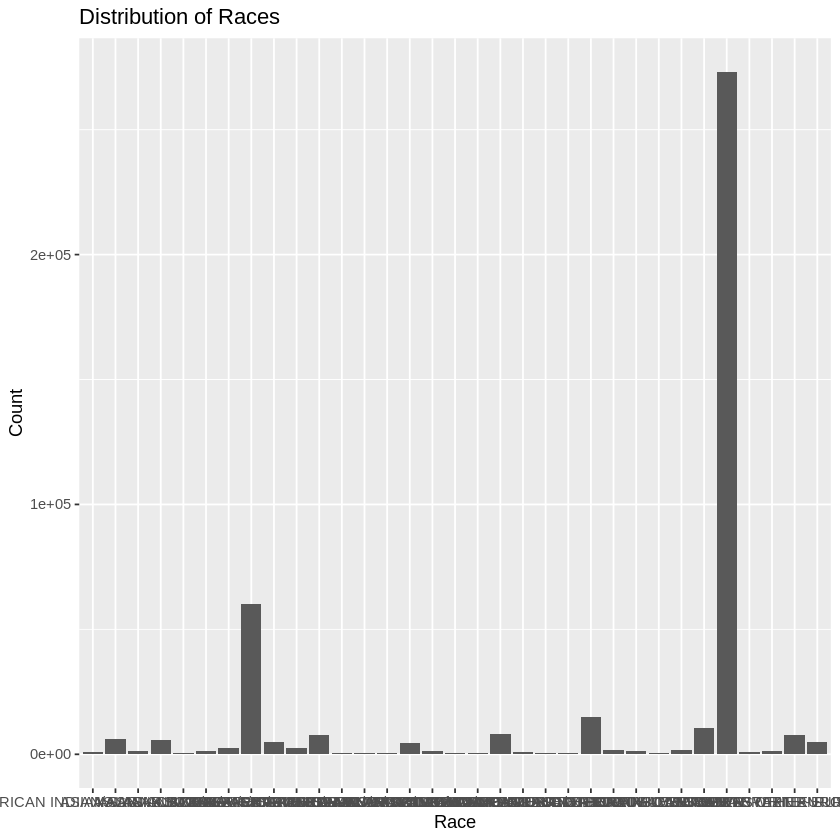

In [ ]:
race_summary <- parquet_data %>%. # %>% multiline. go to the next line
  group_by(race) %>% # in parquet_data, group by race
  summarize(count = n()) # then summarize it and get counts for each race
ggplot(data = race_summary, aes(x = race, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Race") +
  ylab("Count") +
  ggtitle("Distribution of Races")

  # we see that this plot is not very informative.
  # we need to aggregate some categories

Visualization is not good. You need to reduce the number of total race, by replacing any subcategory with main categories.

[1] "WHITE"            "OTHER"            "BLACK"            "UNKNOWN"         
[5] "ASIAN"            "HISPANIC"         "NAT.HAWAIIAN"     "DECLINED TO ANS."
[9] "NAT.ALASKA"

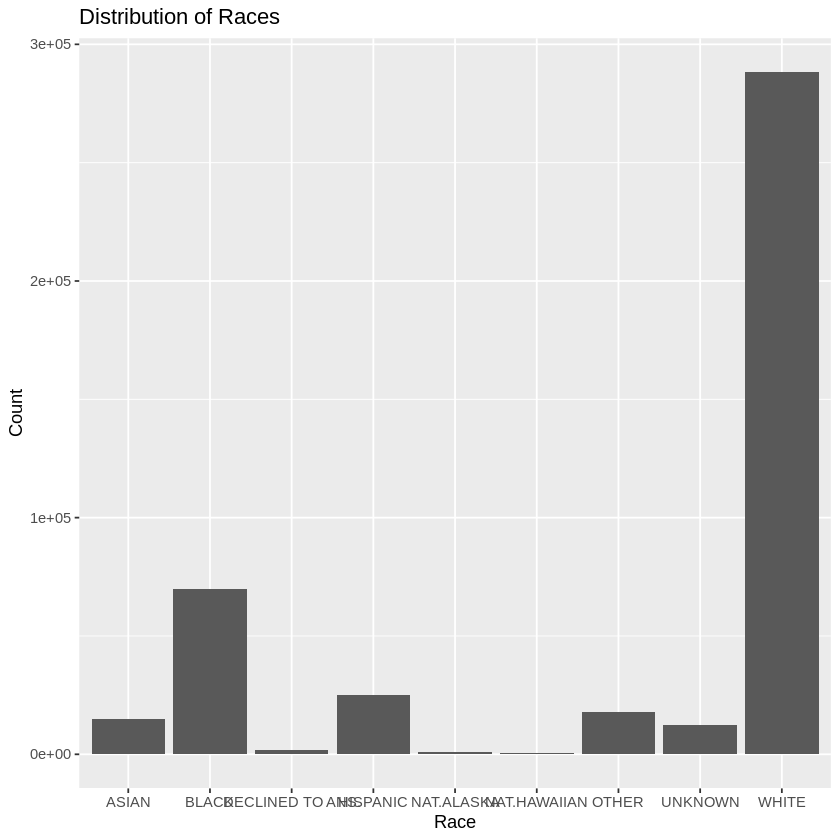

In [ ]:
# Recode race values - grouping the categories into more broader categories to get informative results
# replacing the race column which had MANY different types of races and we're condensing the information into 9 categories
parquet_data$race[grepl("WHITE", parquet_data$race, ignore.case = TRUE)] <- "WHITE"
parquet_data$race[grepl("BLACK", parquet_data$race, ignore.case = TRUE)] <- "BLACK"
parquet_data$race[grepl("ASIAN", parquet_data$race, ignore.case = TRUE)] <- "ASIAN"
parquet_data$race[grepl("HISPANIC/LATINO", parquet_data$race, ignore.case = TRUE)] <- "HISPANIC/LATINO"
parquet_data$race[grepl("HISPANIC OR LATINO", parquet_data$race, ignore.case = TRUE)] <- "HISPANIC/LATINO"
parquet_data$race[grepl("PORTUGUESE", parquet_data$race, ignore.case = TRUE)] <- "OTHER"
parquet_data$race[grepl("SOUTH AMERICAN", parquet_data$race, ignore.case = TRUE)] <- "OTHER"
parquet_data$race[grepl("MULTIPLE RACE/ETHNICITY", parquet_data$race, ignore.case = TRUE)] <- "OTHER"
parquet_data$race[grepl("UNABLE TO OBTAIN", parquet_data$race, ignore.case = TRUE)] <- "UNKNOWN"
parquet_data$race[grepl("NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER", parquet_data$race, ignore.case = TRUE)] <- "NAT.HAWAIIAN"
parquet_data$race[grepl("AMERICAN INDIAN/ALASKA NATIVE", parquet_data$race, ignore.case = TRUE)] <- "NAT.ALASKA"
parquet_data$race[grepl("HISPANIC/LATINO", parquet_data$race, ignore.case = TRUE)] <- "HISPANIC"
parquet_data$race[grepl("PATIENT DECLINED TO ANSWER", parquet_data$race, ignore.case = TRUE)] <- "DECLINED TO ANS."

unique(parquet_data$race)

race_summary <- parquet_data %>%
  group_by(race) %>%
  summarize(count = n())
ggplot(data = race_summary, aes(x = race, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Race") +
  ylab("Count") +
  ggtitle("Distribution of Races")

This was for admission distribution. If we want to see actual patient race distribution, we need to group is based on subject_id

subject_id,race
<int>,<chr>
10000032,WHITE
10000068,WHITE
10000084,WHITE
10000108,WHITE
10000117,WHITE
10000248,WHITE


[1] "WHITE"            "OTHER"            "BLACK"            "UNKNOWN"         
[5] "ASIAN"            "HISPANIC"         "NAT.HAWAIIAN"     "DECLINED TO ANS."
[9] "NAT.ALASKA"

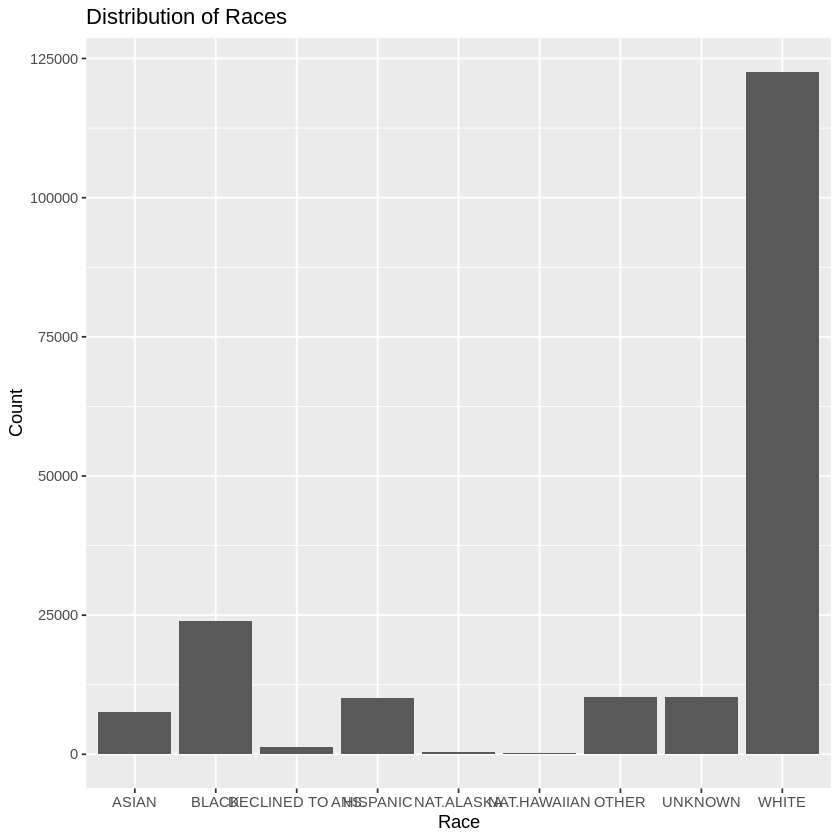

In [ ]:
race_patient <- parquet_data[, c("subject_id", "race")]
race_patient <- unique(race_patient)
head(race_patient)


unique(race_patient$race)

race_summary <- race_patient %>%
  group_by(race) %>%
  summarize(count = n())
ggplot(data = race_summary, aes(x = race, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Race") +
  ylab("Count") +
  ggtitle("Distribution of Races")

# **Reading files with duckdb**

## make an in-memory db and store the connection in a variable


In [5]:
# we're only loading parts that we need for the parque file and loading it into memory.
# duckdb is much more efficient since it doesn't load EVERYTHING into memory (which is the case in parque)
con <- dbConnect(duckdb::duckdb(), dbdir = ":memory:")

In [6]:
admissions=tbl(con, "read_parquet('/content/drive/MyDrive/mimiv-iv-b585/admissions.parquet', hive_partitioning=1)") |>
  collect()

head(admissions)

subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
<int>,<int>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<int>
10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NA,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NA,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NA,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NA,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NA,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NA,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
10000084,23052089,2160-11-21 01:56:00,2160-11-25 14:52:00,NA,EW EMER.,P6957U,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,2160-11-20 20:36:00,2160-11-21 03:20:00,0


## Dealing with the Patient Table

## Try some visualizations from your data

In [7]:
patients=tbl(con, "read_parquet('/content/drive/MyDrive/mimiv-iv-b585/patients.parquet', hive_partitioning=1)") |>
  collect()

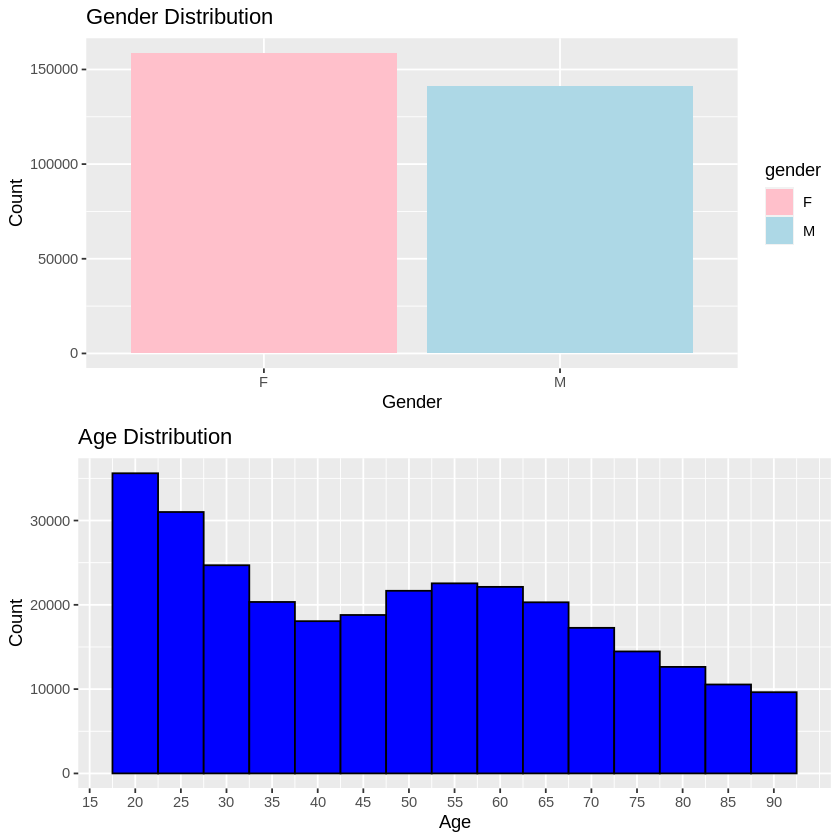

In [8]:
# Create a bar chart for gender distribution
gender_chart <- ggplot(patients, aes(x = gender)) +
  geom_bar(aes(fill = gender)) +
  labs(title = "Gender Distribution", x = "Gender", y = "Count") +
  scale_fill_manual(values = c("F" = "pink", "M" = "lightblue"))

# Create a histogram for age distribution
age_chart <- ggplot(patients, aes(x = anchor_age)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black") +
  labs(title = "Age Distribution", x = "Age", y = "Count") +
  scale_x_continuous(breaks = seq(0, max(patients$anchor_age), by = 5))

# Display the charts side by side
grid.arrange(gender_chart, age_chart)

## Working with icustays table

In [9]:
icustays=tbl(con, "read_parquet('/content/drive/MyDrive/mimiv-iv-b585/icustays.parquet', hive_partitioning=1)") |>
  collect()

In [10]:
head(icustays)

subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
<int>,<int>,<int>,<chr>,<chr>,<dttm>,<dttm>,<dbl>
10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.4102662
10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.4975347
10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.1180325
10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.9481134
10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.3385880
10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.1718168


### Create a box plot of LOS by Care Unit
LOS is length of stay

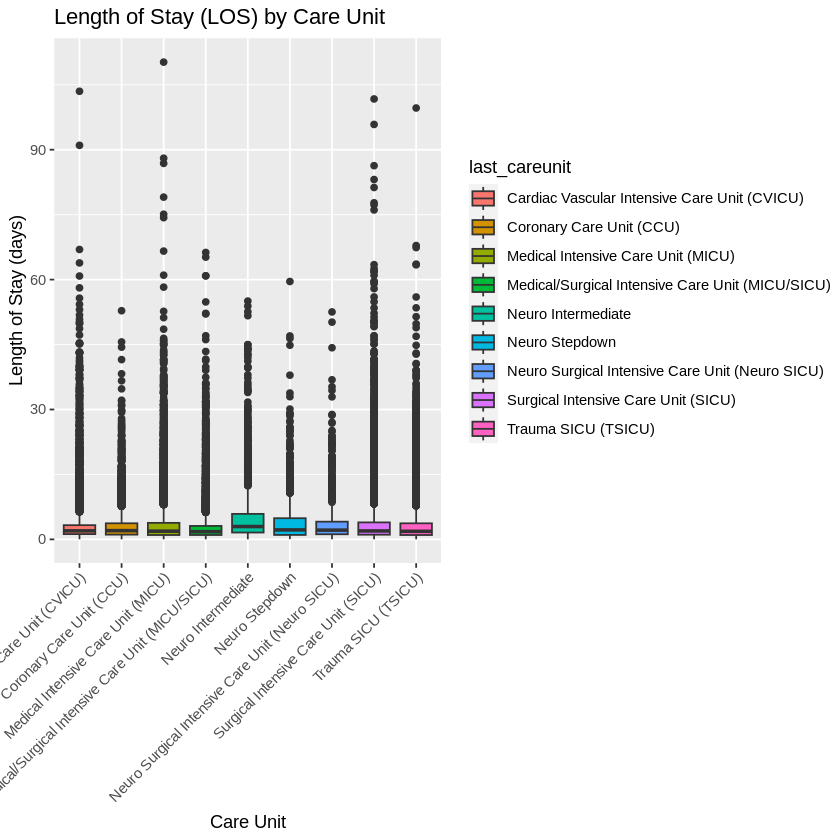

In [11]:
ggplot(icustays, aes(x = last_careunit, y = los, fill = last_careunit)) +
  geom_boxplot() +
  labs(title = "Length of Stay (LOS) by Care Unit",
       x = "Care Unit",
       y = "Length of Stay (days)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


### Remove the outliers from the boxplot figure

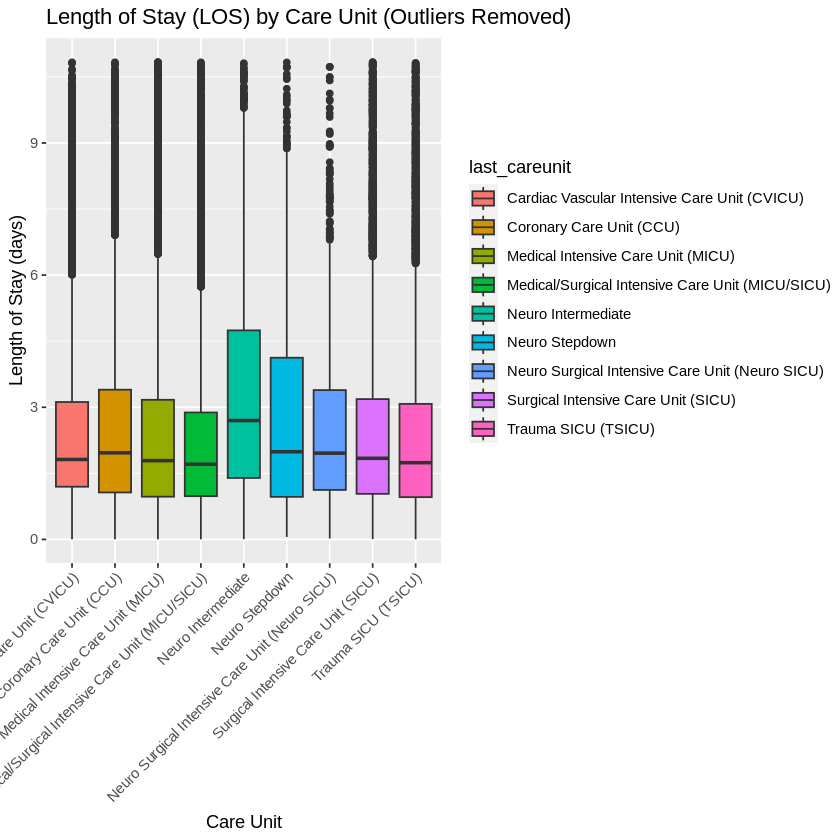

In [ ]:
# we can remove outliers by looking at the standard deviation (how far a value is from the mean)
# Calculate mean and standard deviation of 'los'
mean_los <- mean(icustays$los)
sd_los <- sd(icustays$los)

# Define the threshold for outliers
threshold <- 1.5 * sd_los # we want to remove outliers that are 2 standard deviations (1.5) away from the mean
# in a normal distribution its 95% confidence

# Filter the data to exclude outliers
icustays_removed_outliers <- icustays[abs(icustays$los - mean_los) <= threshold, ] # anything that is <= the threshold is an outlier and should be removed

ggplot(icustays_removed_outliers, aes(x = last_careunit, y = los, fill = last_careunit)) +
  geom_boxplot() +
  labs(title = "Length of Stay (LOS) by Care Unit (Outliers Removed)",
       x = "Care Unit",
       y = "Length of Stay (days)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


## Statistical Tests using MIMIC Data

Check the icustays table, it has Length of Stays (LOS) and ICU admit time (intime) in it. We want to find the correlation between these two variables.
First we want to convert the 'intime' variable into a numerical variable. From date time format, we will convert the values such a way that if a patient is brought to the ICU on any specific time, the time will be counted from 8 AM. For example, if a patient is brought to ICU at 10 AM, the corresponding value variable intime will be 2 (10 AM - 8AM)=2 hours. Thus we want to see if there is any correlation between intime and LOS in ICU.

In [12]:
head(icustays)

subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los
<int>,<int>,<int>,<chr>,<chr>,<dttm>,<dttm>,<dbl>
10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.4102662
10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.4975347
10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.1180325
10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.9481134
10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.3385880
10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.1718168


In [14]:
# Convert the columns to the correct format
# hypothesis: is there a correlation between people who get to ICU late and getting sick?
# want to look at intime after 8am

# from the intime we only want to take the time component. ignore date
# Create 'intime_converted' column based on 'intime' (hours and minutes)
icustays <- icustays %>%
  mutate(
    intime_converted = as.POSIXct(intime, format = "%Y-%m-%d %H:%M:%S"),  # Convert 'intime' to DateTime
    time_component = hour(intime_converted),          # Extract hour component
    minute_component = minute(intime_converted),      # Extract minute component
    intime_converted = ifelse(time_component >= 8, # trying to see how many hours passed since 8am
                             (time_component - 8) + (minute_component / 60),  # Calculate time passed from 8 AM in hours
                             (24 + time_component - 8) + (minute_component / 60))
  ) %>%
  select(-time_component, -minute_component)  # Remove temporary columns

# View the updated DataFrame with the new 'intime_converted' column
head(icustays)


subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,intime_converted
<int>,<int>,<int>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<dbl>
10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.4102662,6.000000
10000980,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.4975347,0.700000
10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.1180325,11.300000
10001217,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.9481134,7.700000
10001725,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.3385880,7.866667
10001884,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.1718168,20.333333


### Correlations

In [17]:
# check for correlation
new_icustays <- head(icustays, n=50) # ran on 50 patients

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


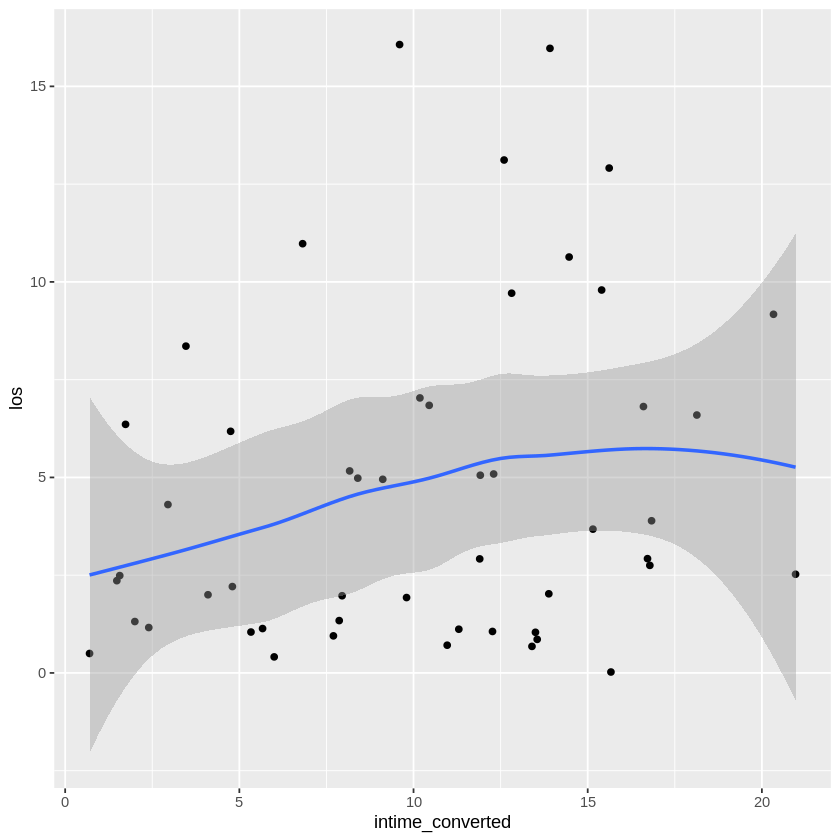

In [18]:
ggplot(new_icustays, aes(x=intime_converted, y=los)) + geom_point()+ geom_smooth()

# we see that there is somewhat positive, but its not strong. It is this model linear?

### Before Correlation test
Are the data from each of the 2 variables (x, y) follow a normal distribution?

In [19]:
shapiro.test(new_icustays$intime_converted)
shapiro.test(new_icustays$los)


	Shapiro-Wilk normality test

data:  new_icustays$intime_converted
W = 0.96943, p-value = 0.2194



	Shapiro-Wilk normality test

data:  new_icustays$los
W = 0.86421, p-value = 3.841e-05


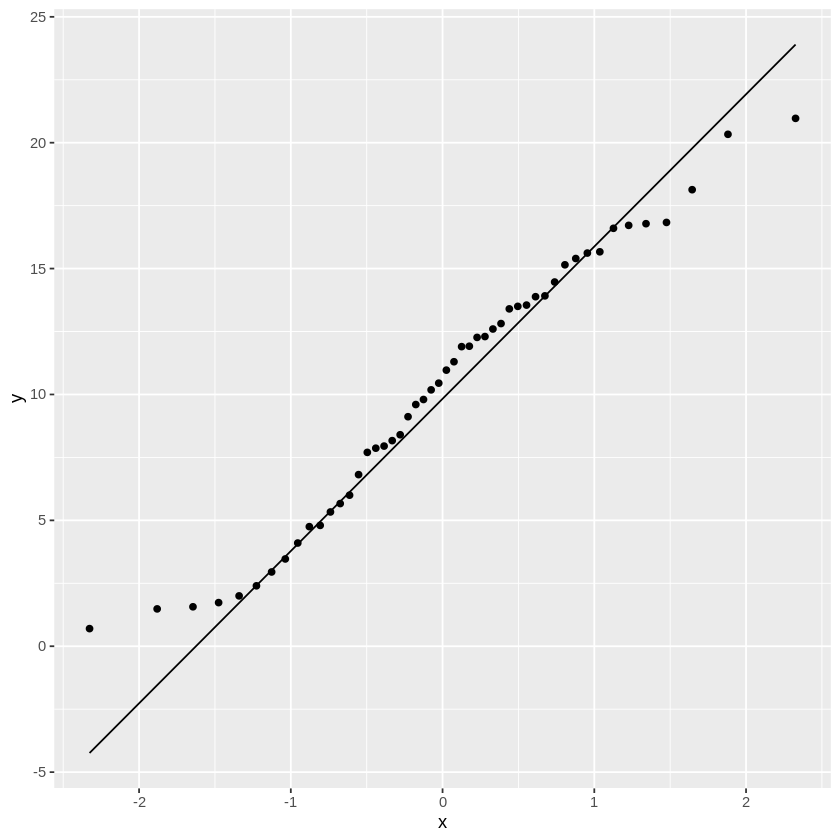

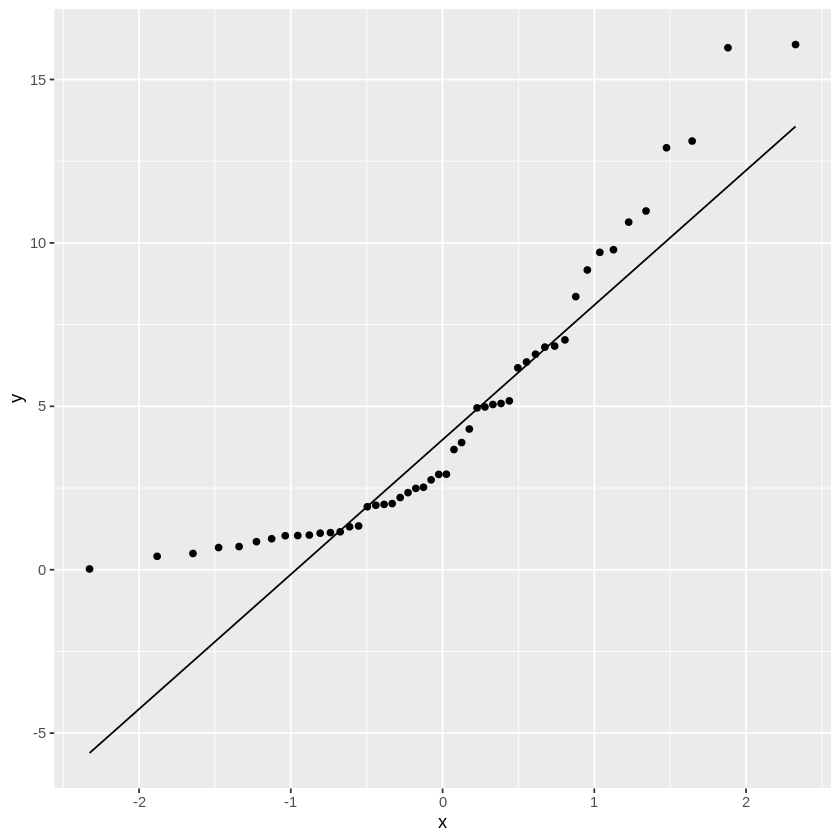

In [ ]:
ggplot(new_icustays, aes(sample=intime_converted)) + stat_qq() + stat_qq_line() # somewhat normally distributed
ggplot(new_icustays, aes(sample=los)) + stat_qq() + stat_qq_line() # not normally distributed

In [ ]:
cor.test(new_icustays$intime_converted, new_icustays$los, method = "pearson")
# we should not use pearson because data is non-linear
# we get p-value > 0.05 so we would incorrectly accept the null hypothesis

cor.test(new_icustays$intime_converted, new_icustays$los, method = "spearman")
cor.test(new_icustays$intime_converted, new_icustays$los, method = "kendall") # we need to use this


	Pearson's product-moment correlation

data:  new_icustays$intime_converted and new_icustays$los
t = 1.727, df = 48, p-value = 0.0906
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03910962  0.48740468
sample estimates:
      cor 
0.2418711 



	Spearman's rank correlation rho

data:  new_icustays$intime_converted and new_icustays$los
S = 15746, p-value = 0.08794
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2438896 



	Kendall's rank correlation tau

data:  new_icustays$intime_converted and new_icustays$los
z = 1.4806, p-value = 0.1387
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1444898 


## One sample t-test
The test of independence

In [ ]:
mean(icustays$los) # mean length of stay : patient stays for average of 3.5 days

[1] 3.451931

In [20]:
t.test(icustays$los, mu=3.5)

# p (0.008) is less than 0.05. We can reject the null hypothesis that (ex) isreal has mean stay of 3.5
# this is a two-sided test.


	One Sample t-test

data:  icustays$los
t = -2.6415, df = 73180, p-value = 0.008256
alternative hypothesis: true mean is not equal to 3.5
95 percent confidence interval:
 3.416263 3.487598
sample estimates:
mean of x 
 3.451931 


In [21]:
t.test(icustays$los, mu=3.5, alternative="less") # Is the error in the lesser side?


	One Sample t-test

data:  icustays$los
t = -2.6415, df = 73180, p-value = 0.004128
alternative hypothesis: true mean is less than 3.5
95 percent confidence interval:
     -Inf 3.481864
sample estimates:
mean of x 
 3.451931 


In [22]:
t.test(icustays$los, mu=3.5, alternative="greater")

# in comparision to lesser, we see that the errors lie more in the less side. This means that there is lesser LOR in hospital in Isreal


	One Sample t-test

data:  icustays$los
t = -2.6415, df = 73180, p-value = 0.9959
alternative hypothesis: true mean is greater than 3.5
95 percent confidence interval:
 3.421998      Inf
sample estimates:
mean of x 
 3.451931 


## Two sample t-test

In [23]:
patients=tbl(con, "read_parquet('/content/drive/MyDrive/mimiv-iv-b585/patients.parquet', hive_partitioning=1)") |>
  collect()

In [25]:
new_patients <- head(patients) # we're taking all patients
mean(new_patients$anchor_age[new_patients$gender=='F']) # getting age for females
mean(new_patients$anchor_age[new_patients$gender=='M']) # getting age for males


female.anchor_age <- new_patients$anchor_age[new_patients$gender=='F']
male.anchor_age <- new_patients$anchor_age[new_patients$gender=='M']

t.test(female.anchor_age, male.anchor_age, alternative="less")

# we see that the dataset has younger females and older males
# t-test assumptions: data is normal and homogeniety of variables

# we should not reject the null hypothesis since p > 0.05

[1] 30.25

[1] 48.5


	Welch Two Sample t-test

data:  female.anchor_age and male.anchor_age
t = -0.74045, df = 1.206, p-value = 0.2881
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 99.17127
sample estimates:
mean of x mean of y 
    30.25     48.50 


### Cohen's d

In [27]:
install.packages("effsize")
library(effsize)

cohen.d(female.anchor_age, male.anchor_age)

# effect size: we want to not just know the errors. We also want to know the fit of the model
# effect size tell us ~ for what percent of the people will your model work on?

#

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Cohen's d

d estimate: -0.8682482 (large)
95 percent confidence interval:
    lower     upper 
-3.371397  1.634900 


## Merge two tables together (patients and icustays)

In [ ]:
# Merge the 'patients' and 'icustays' tables based on 'subject_id'
merged_table <- patients %>%
  inner_join(icustays, by = "subject_id")

# View the merged table
head(merged_table)


subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,intime_converted
<int>,<chr>,<int>,<int>,<chr>,<date>,<int>,<int>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<dbl>
10000032,F,52,2180,2014 - 2016,2180-09-09,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.4102662,6.000000
10000980,F,73,2186,2008 - 2010,2193-08-26,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.4975347,0.700000
10001217,F,55,2157,2011 - 2013,NA,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.1180325,11.300000
10001217,F,55,2157,2011 - 2013,NA,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.9481134,7.700000
10001725,F,46,2110,2011 - 2013,NA,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.3385880,7.866667
10001884,F,68,2122,2008 - 2010,2131-01-20,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.1718168,20.333333


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


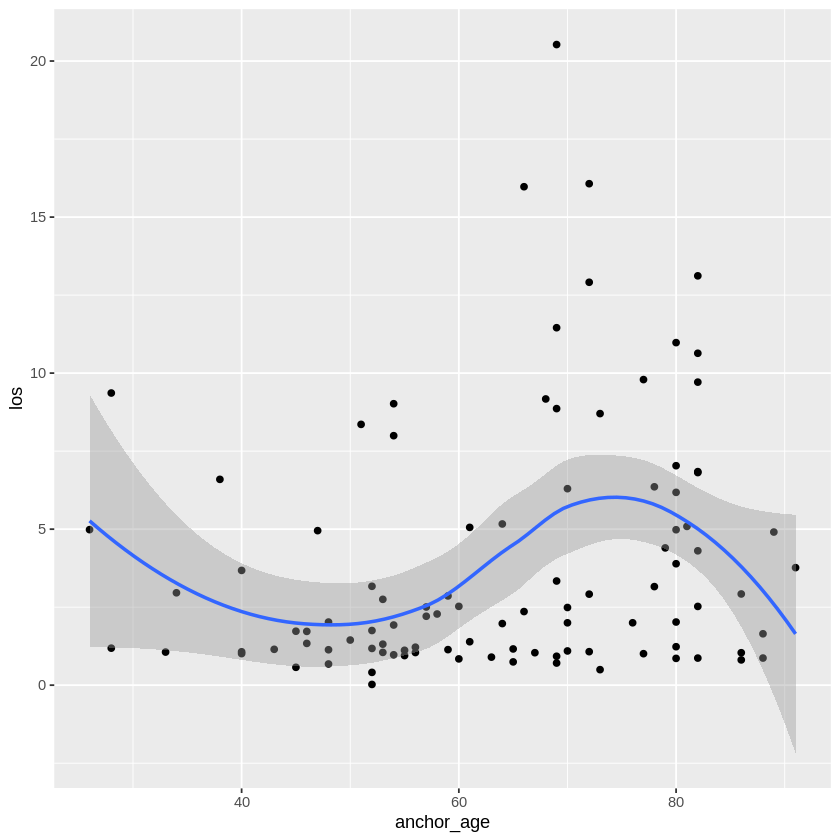

In [ ]:
merged_table_new <- head(merged_table, n=100)
ggplot(merged_table_new, aes(x=anchor_age, y=los)) + geom_point()+ geom_smooth()

## Box plot of the means for different groups (Gender)

In [ ]:
head(merged_table)

subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,intime_converted
<int>,<chr>,<int>,<int>,<chr>,<date>,<int>,<int>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<dbl>
10000032,F,52,2180,2014 - 2016,2180-09-09,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.4102662,6.000000
10000980,F,73,2186,2008 - 2010,2193-08-26,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.4975347,0.700000
10001217,F,55,2157,2011 - 2013,NA,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.1180325,11.300000
10001217,F,55,2157,2011 - 2013,NA,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.9481134,7.700000
10001725,F,46,2110,2011 - 2013,NA,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.3385880,7.866667
10001884,F,68,2122,2008 - 2010,2131-01-20,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.1718168,20.333333


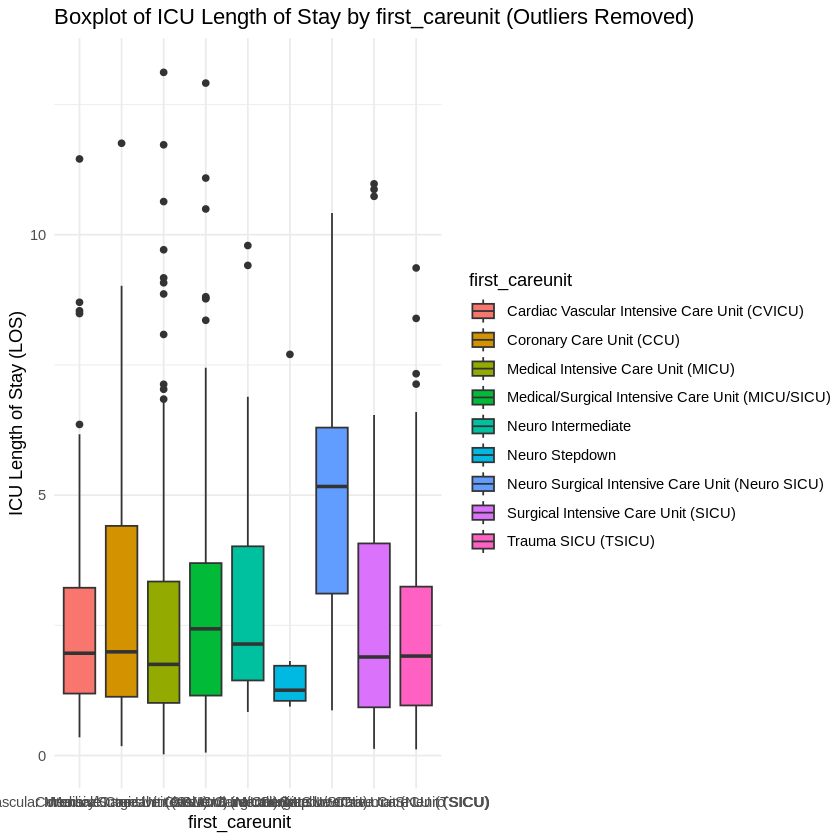

In [ ]:
merged_table_new=head(merged_table, n=500)

# Calculate mean and standard deviation of 'los'
mean_los <- mean(merged_table_new$los)
sd_los <- sd(merged_table_new$los)

# Define the threshold for outliers (mean ± 2 * SD)
lower_threshold <- mean_los - 2 * sd_los
upper_threshold <- mean_los + 2 * sd_los

# Filter the data to exclude outliers
filtered_table <- merged_table_new %>%
  filter(los >= lower_threshold, los <= upper_threshold)

# Create a boxplot of 'los' by 'gender' with outliers removed
ggplot(filtered_table, aes(x = first_careunit	, y = los, fill = first_careunit	)) +
  geom_boxplot() +
  labs(
    title = "Boxplot of ICU Length of Stay by first_careunit (Outliers Removed)",
    x = "first_careunit	",
    y = "ICU Length of Stay (LOS)"
  ) +
  theme_minimal()


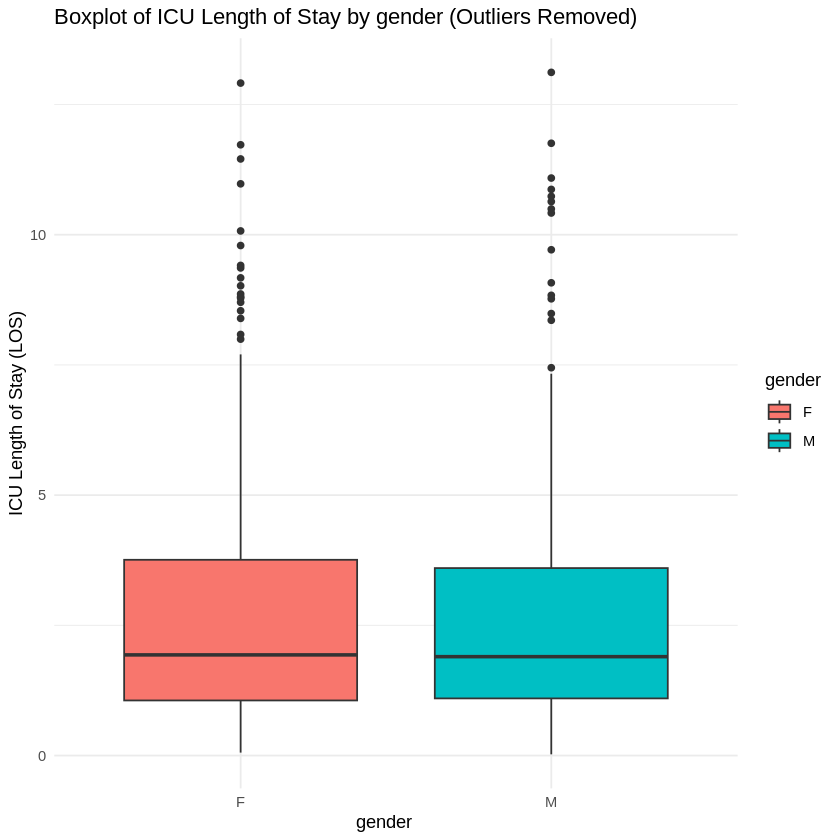

In [ ]:
merged_table_new=head(merged_table, n=500)

# Calculate mean and standard deviation of 'los'
mean_los <- mean(merged_table_new$los)
sd_los <- sd(merged_table_new$los)

# Define the threshold for outliers (mean ± 2 * SD)
lower_threshold <- mean_los - 2 * sd_los
upper_threshold <- mean_los + 2 * sd_los

# Filter the data to exclude outliers
filtered_table <- merged_table_new %>%
  filter(los >= lower_threshold, los <= upper_threshold)

# Create a boxplot of 'los' by 'gender' with outliers removed
ggplot(filtered_table, aes(x = gender	, y = los, fill = gender	)) +
  geom_boxplot() +
  labs(
    title = "Boxplot of ICU Length of Stay by gender (Outliers Removed)",
    x = "gender	",
    y = "ICU Length of Stay (LOS)"
  ) +
  theme_minimal()


## ANOVA Test

In [ ]:
the.anova <- aov(los ~ first_careunit, data=merged_table)
summary(the.anova)

                  Df  Sum Sq Mean Sq F value Pr(>F)    
first_careunit     8   21100  2637.5   110.1 <2e-16 ***
Residuals      73172 1752370    23.9                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Chi-Square Test

In [ ]:
head(merged_table)

subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,intime_converted
<int>,<chr>,<int>,<int>,<chr>,<date>,<int>,<int>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<dbl>
10000032,F,52,2180,2014 - 2016,2180-09-09,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.4102662,6.000000
10000980,F,73,2186,2008 - 2010,2193-08-26,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.4975347,0.700000
10001217,F,55,2157,2011 - 2013,NA,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.1180325,11.300000
10001217,F,55,2157,2011 - 2013,NA,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.9481134,7.700000
10001725,F,46,2110,2011 - 2013,NA,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.3385880,7.866667
10001884,F,68,2122,2008 - 2010,2131-01-20,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.1718168,20.333333


Let's create "death" column to record the death status of the patients from "date of death" column

In [ ]:
merged_table$death <- ifelse(is.na(merged_table$dod), "No", "Yes")
head(merged_table)

subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,intime_converted,death
<int>,<chr>,<int>,<int>,<chr>,<date>,<int>,<int>,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<chr>
10000032,F,52,2180,2014 - 2016,2180-09-09,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.4102662,6.000000,Yes
10000980,F,73,2186,2008 - 2010,2193-08-26,26913865,39765666,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2189-06-27 08:42:00,2189-06-27 20:38:27,0.4975347,0.700000,Yes
10001217,F,55,2157,2011 - 2013,NA,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.1180325,11.300000,No
10001217,F,55,2157,2011 - 2013,NA,27703517,34592300,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-12-19 15:42:24,2157-12-20 14:27:41,0.9481134,7.700000,No
10001725,F,46,2110,2011 - 2013,NA,25563031,31205490,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2110-04-11 15:52:22,2110-04-12 23:59:56,1.3385880,7.866667,No
10001884,F,68,2122,2008 - 2010,2131-01-20,26184834,37510196,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2131-01-11 04:20:05,2131-01-20 08:27:30,9.1718168,20.333333,Yes


In [ ]:
merged_table_new <- select(merged_table, gender, anchor_age, first_careunit, los, intime_converted, death)
head(merged_table_new)

gender,anchor_age,first_careunit,los,intime_converted,death
<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
F,52,Medical Intensive Care Unit (MICU),0.4102662,6.000000,Yes
F,73,Medical Intensive Care Unit (MICU),0.4975347,0.700000,Yes
F,55,Surgical Intensive Care Unit (SICU),1.1180325,11.300000,No
F,55,Surgical Intensive Care Unit (SICU),0.9481134,7.700000,No
F,46,Medical/Surgical Intensive Care Unit (MICU/SICU),1.3385880,7.866667,No
F,68,Medical Intensive Care Unit (MICU),9.1718168,20.333333,Yes


In [ ]:
# create cross-tabulation
cross.tab <- xtabs(los ~ gender+death, data=merged_table_new)
chisq.test(cross.tab)


	Pearson's Chi-squared test with Yates' continuity correction

data:  cross.tab
X-squared = 23.431, df = 1, p-value = 1.295e-06
